In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import ndlib
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from collections import Counter
from networkx.algorithms.community import k_clique_communities
%matplotlib inline


In [ ]:
# 1.1 For the different categories of nodes, perform the usual analyses:
# • Number of nodes and edges
# • Average Clustering coefficient
# • Degree distribution
# • Degree correlations
# • Top 3 nodes with highest degree and clustering coefficient.

In [2]:
target = pd.read_csv('musae_facebook_target.csv')
edges = pd.read_csv('musae_facebook_edges.csv')

tvshow_list = []
government_list = []
company_list = []
politician_list = []

#divide nodes to four categories
for index, row in target.iterrows():
    if row["page_type"] == "tvshow":
        tvshow_list.append(row["id"])
    if row["page_type"] == "government":
        government_list.append(row["id"])
    if row["page_type"] == "company":
        company_list.append(row["id"])
    if row["page_type"] == "politician":
        politician_list.append(row["id"])
        

In [3]:
# merge edges and target
edges = edges.rename(columns={'id_1': 'id'})
merged = pd.merge(edges, target[["id","page_type"]], on='id', how='left')
target2 = target.rename(columns={'id': 'id_2'})
merged2 = pd.merge(merged, target2[["id_2","page_type"]], on="id_2", how="left")

In [4]:
# total graph
G = nx.Graph()
for it, cat in zip(target['id'], target['page_type']):
    G.add_node(it, page_type=cat)
for n1, n2 in zip(edges['id'], edges['id_2']):
    G.add_edge(n1, n2)

For tvshow:
Number of nodes: 3327
Number of edges: 12991
Average Clustering coefficient: 0.3960098344219939
Degree correlations: 0.6320543796840544


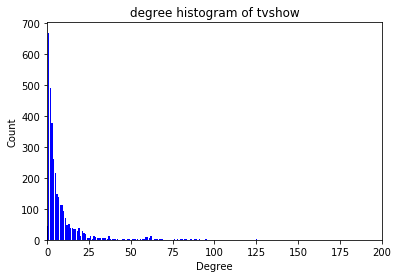

Top 3 nodes with highest degree:
node: 4296, degree: 125
node: 7919, degree: 95
node: 20516, degree: 91
Top 3 nodes with highest clustering coefficient:
node: 8208, clustering coefficient: 1.0
node: 16416, clustering coefficient: 1.0
node: 8225, clustering coefficient: 1.0


In [5]:
print("For tvshow:")

po_nodes = (n for n,d in G.nodes(data=True) if d['page_type']=='tvshow')
fb1 = G.subgraph(po_nodes)
num_nodes = fb1.number_of_nodes()
num_edges = fb1.number_of_edges()
avg_cc = nx.average_clustering(fb1)
deg_corr = nx.degree_pearson_correlation_coefficient(fb1)
print("Number of nodes: " + str(num_nodes))
print("Number of edges: " + str(num_edges))
print("Average Clustering coefficient: " + str(avg_cc))
print("Degree correlations: " + str(deg_corr))


degree_sequence = sorted([d for n, d in fb1.degree()], reverse=True)
degree_count = Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())
fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("degree histogram of tvshow")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xlim(0, 200)
plt.show()


dic_deg = dict(nx.degree(fb1))
top3_degree = sorted(dic_deg.items(), key=lambda item:item[1], reverse=True)[:3]
print("Top 3 nodes with highest degree:")
for node in top3_degree:
    print("node: " + str(node[0]) + ", degree: " + str(node[1]))


dic_cc = nx.clustering(fb1)
top3_cc = sorted(dic_cc.items(), key=lambda item:item[1], reverse=True)[:3]
print("Top 3 nodes with highest clustering coefficient:")
for node in top3_cc:
    print("node: " + str(node[0]) + ", clustering coefficient: " + str(node[1]))

For government:
Number of nodes: 6880
Number of edges: 81367
Average Clustering coefficient: 0.44447993621490417
Degree correlations: 0.0240331967828739


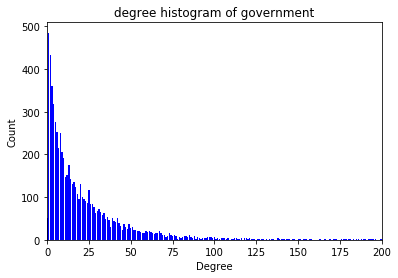

Top 3 nodes with highest degree:
node: 16895, degree: 669
node: 14497, degree: 639
node: 19743, degree: 603
Top 3 nodes with highest clustering coefficient:
node: 9, clustering coefficient: 1.0
node: 10, clustering coefficient: 1.0
node: 15, clustering coefficient: 1.0


In [6]:
print("For government:")

po_nodes = (n for n,d in G.nodes(data=True) if d['page_type']=='government')
fb2 = G.subgraph(po_nodes)
num_nodes = fb2.number_of_nodes()
num_edges = fb2.number_of_edges()
avg_cc = nx.average_clustering(fb2)
deg_corr = nx.degree_assortativity_coefficient(fb2)
print("Number of nodes: " + str(num_nodes))
print("Number of edges: " + str(num_edges))
print("Average Clustering coefficient: " + str(avg_cc))
print("Degree correlations: " + str(deg_corr))


degree_sequence = sorted([d for n, d in fb2.degree()], reverse=True)
degree_count = Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())
fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("degree histogram of government")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xlim(0, 200)
plt.show()


dic_deg = dict(nx.degree(fb2))
top3_degree = sorted(dic_deg.items(), key=lambda item:item[1], reverse=True)[:3]
print("Top 3 nodes with highest degree:")
for node in top3_degree:
    print("node: " + str(node[0]) + ", degree: " + str(node[1]))


dic_cc = nx.clustering(fb2)
top3_cc = sorted(dic_cc.items(), key=lambda item:item[1], reverse=True)[:3]
print("Top 3 nodes with highest clustering coefficient:")
for node in top3_cc:
    print("node: " + str(node[0]) + ", clustering coefficient: " + str(node[1]))

For company:
Number of nodes: 6495
Number of edges: 20145
Average Clustering coefficient: 0.27966709873966866
Degree correlations: 0.02853380927225508


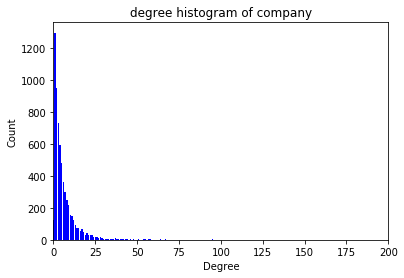

Top 3 nodes with highest degree:
node: 701, degree: 187
node: 2597, degree: 95
node: 17392, degree: 95
Top 3 nodes with highest clustering coefficient:
node: 63, clustering coefficient: 1.0
node: 125, clustering coefficient: 1.0
node: 198, clustering coefficient: 1.0


In [7]:
print("For company:")

po_nodes = (n for n,d in G.nodes(data=True) if d['page_type']=='company') 
fb3 = G.subgraph(po_nodes) 
num_nodes = fb3.number_of_nodes() 
num_edges = fb3.number_of_edges() 
avg_cc = nx.average_clustering(fb3) 
deg_corr = nx.degree_assortativity_coefficient(fb3) 
print("Number of nodes: " + str(num_nodes)) 
print("Number of edges: " + str(num_edges)) 
print("Average Clustering coefficient: " + str(avg_cc)) 
print("Degree correlations: " + str(deg_corr))

degree_sequence = sorted([d for n, d in fb3.degree()], reverse=True) 
degree_count = Counter(degree_sequence) 
deg, cnt = zip(*degree_count.items()) 
fig, ax = plt.subplots(figsize=(6, 4)) 
plt.bar(deg, cnt, width=0.80, color="b") 
plt.title("degree histogram of company") 
plt.ylabel("Count") 
plt.xlabel("Degree") 
plt.xlim(0, 200) 
plt.show()

dic_deg = dict(nx.degree(fb3)) 
top3_degree = sorted(dic_deg.items(), key=lambda item:item[1], reverse=True)[:3] 
print("Top 3 nodes with highest degree:") 
for node in top3_degree: 
    print("node: " + str(node[0]) + ", degree: " + str(node[1]))

dic_cc = nx.clustering(fb3) 
top3_cc = sorted(dic_cc.items(), key=lambda item:item[1], reverse=True)[:3]
print("Top 3 nodes with highest clustering coefficient:") 
for node in top3_cc: 
    print("node: " + str(node[0]) + ", clustering coefficient: " + str(node[1]))

For politician:
Number of nodes: 5768
Number of edges: 36909
Average Clustering coefficient: 0.41180634973051494
Degree correlations: -0.005407806763606469


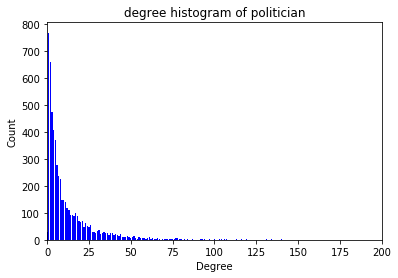

Top 3 nodes with highest degree:
node: 14650, degree: 323
node: 20415, degree: 253
node: 21491, degree: 222
Top 3 nodes with highest clustering coefficient:
node: 33, clustering coefficient: 1.0
node: 62, clustering coefficient: 1.0
node: 93, clustering coefficient: 1.0


In [8]:
print("For politician:")

po_nodes = (n for n,d in G.nodes(data=True) if d['page_type']=='politician')
fb4 = G.subgraph(po_nodes)
num_nodes = fb4.number_of_nodes()
num_edges = fb4.number_of_edges()
avg_cc = nx.average_clustering(fb4)
deg_corr = nx.degree_assortativity_coefficient(fb4)
print("Number of nodes: " + str(num_nodes))
print("Number of edges: " + str(num_edges))
print("Average Clustering coefficient: " + str(avg_cc))
print("Degree correlations: " + str(deg_corr))


degree_sequence = sorted([d for n, d in fb4.degree()], reverse=True)
degree_count = Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())
fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("degree histogram of politician")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xlim(0, 200)
plt.show()


dic_deg = dict(nx.degree(fb4))
top3_degree = sorted(dic_deg.items(), key=lambda item:item[1], reverse=True)[:3]
print("Top 3 nodes with highest degree:")
for node in top3_degree:
    print("node: " + str(node[0]) + ", degree: " + str(node[1]))


dic_cc = nx.clustering(fb4)
top3_cc = sorted(dic_cc.items(), key=lambda item:item[1], reverse=True)[:3]
print("Top 3 nodes with highest clustering coefficient:")
for node in top3_cc:
    print("node: " + str(node[0]) + ", clustering coefficient: " + str(node[1]))

In [ ]:
# 1.2. Construct a matrix (table) showing the fraction of edges from each category going to each other category. 
# That is, Tij will be the fraction of links from category i that go to category j. Diagonal entries Tii will show 
# the fraction of edges within the category itself.
# Detect also the top 3 nodes with highest inter-category edges. 
# Plot the distribution of edge- betweenness centrality for edges inside each category.

In [9]:
print("category matrix:")
category_matrix1 = merged2[["page_type_x", "page_type_y"]].groupby("page_type_x")["page_type_y"].value_counts().unstack()
category_matrix2 = merged2[["page_type_x", "page_type_y"]].groupby("page_type_y")["page_type_x"].value_counts().unstack()
category_matrix = category_matrix1 + category_matrix2
category_matrix.apply(lambda x: x / x.sum())

category matrix:


page_type_y,company,government,politician,tvshow
page_type_x,,,,
company,0.836604,0.026460,0.007976,0.080279
government,0.097739,0.914781,0.108753,0.039041
politician,0.014078,0.051969,0.868355,0.040980
tvshow,0.051579,0.006791,0.014916,0.839700


In [10]:
# devide to inside and inter subsets
tvshow_inside = merged2.loc[(merged2["page_type_x"] == "tvshow") & (merged2["page_type_y"] == "tvshow"),["id","id_2"]]
tvshow_inside.set_index(["id"], inplace=True)
tvshow_inside.to_csv("tvshow_inside_edges.txt",sep=" ")
tvshow_inter = merged2.loc[((merged2["page_type_x"] == "tvshow") ^ (merged2["page_type_y"] == "tvshow")) |
                          ((merged2["page_type_y"] == "tvshow") ^ (merged2["page_type_x"] == "tvshow")) ,["id","id_2"]]
tvshow_inter.set_index(["id"], inplace=True)
tvshow_inter.to_csv("tvshow_inter_edges.txt",sep=" ")


government_inside = merged2.loc[(merged2["page_type_x"] == "government") & (merged2["page_type_y"] == "government"),["id","id_2"]]
government_inside.set_index(["id"], inplace=True)
government_inside.to_csv("government_inside_edges.txt",sep=" ")
government_inter = merged2.loc[((merged2["page_type_x"] == "government") ^ (merged2["page_type_y"] == "government")) |
                          ((merged2["page_type_y"] == "government") ^ (merged2["page_type_x"] == "government")) ,["id","id_2"]]
government_inter.set_index(["id"], inplace=True)
government_inter.to_csv("government_inter_edges.txt",sep=" ")


company_inside = merged2.loc[(merged2["page_type_x"] == "company") & (merged2["page_type_y"] == "company"),["id","id_2"]]
company_inside.set_index(["id"], inplace=True)
company_inside.to_csv("company_inside_edges.txt",sep=" ")
company_inter = merged2.loc[((merged2["page_type_x"] == "company") ^ (merged2["page_type_y"] == "company")) |
                          ((merged2["page_type_y"] == "company") ^ (merged2["page_type_x"] == "company")) ,["id","id_2"]]
company_inter.set_index(["id"], inplace=True)
company_inter.to_csv("company_inter_edges.txt",sep=" ")


politician_inside = merged2.loc[(merged2["page_type_x"] == "politician") & (merged2["page_type_y"] == "politician"),["id","id_2"]]
politician_inside.set_index(["id"], inplace=True)
politician_inside.to_csv("politician_inside_edges.txt",sep=" ")
politician_inter = merged2.loc[((merged2["page_type_x"] == "politician") ^ (merged2["page_type_y"] == "politician")) |
                          ((merged2["page_type_y"] == "politician") ^ (merged2["page_type_x"] == "politician")) ,["id","id_2"]]
politician_inter.set_index(["id"], inplace=True)
politician_inter.to_csv("politician_inter_edges.txt",sep=" ")

Top 3 nodes with highest inter-category degree in tvshow:
node: 909, degree: 104
node: 15839, degree: 58
node: 13435, degree: 49


Text(0.5, 1.0, 'edge-betweenness centrality inside tvshow')

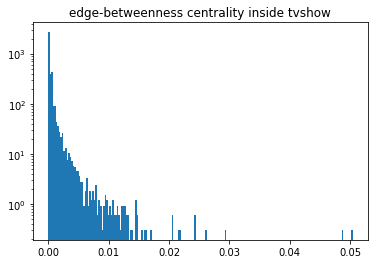

In [17]:
tvshow_inter = nx.readwrite.edgelist.read_edgelist("tvshow_inter_edges.txt")
tvshow_inter.remove_node("id")
tvshow_inter.remove_node("id_2")
dic_deg = dict(nx.degree(tvshow_inter))
top3_degree = []
for item in sorted(dic_deg.items(), key=lambda item:item[1], reverse=True):
    if int(item[0]) in tvshow_list:
        top3_degree.append(item)
    if len(top3_degree) == 3:
        break
print("Top 3 nodes with highest inter-category degree in tvshow:")
for node in top3_degree:
    print("node: " + str(node[0]) + ", degree: " + str(node[1]))

    
tvshow_inside = nx.readwrite.edgelist.read_edgelist("tvshow_inside_edges.txt")
tvshow_inside.remove_node("id")
tvshow_inside.remove_node("id_2")
dic_cen = nx.edge_betweenness_centrality(tvshow_inside)
plt.figure(figsize=(6, 4)) 
ds = [val for (node, val) in dic_cen.items()]
plt.hist(ds, bins=200, density=True, log=True)
plt.title('edge-betweenness centrality inside tvshow')

Top 3 nodes with highest inter-category degree in government:
node: 16052, degree: 265
node: 21120, degree: 187
node: 13098, degree: 121


Text(0.5, 1.0, 'edge-betweenness centrality inside government')

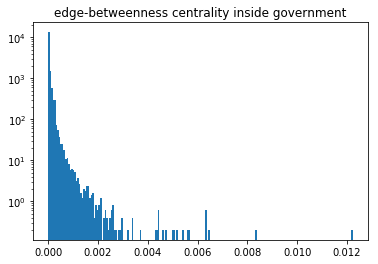

In [18]:
government_inter = nx.readwrite.edgelist.read_edgelist("government_inter_edges.txt")
government_inter.remove_node("id")
government_inter.remove_node("id_2")
dic_deg = dict(nx.degree(government_inter))
top3_degree = []
for item in sorted(dic_deg.items(), key=lambda item:item[1], reverse=True):
    if int(item[0]) in government_list:
        top3_degree.append(item)
    if len(top3_degree) == 3:
        break
print("Top 3 nodes with highest inter-category degree in government:")
for node in top3_degree:
    print("node: " + str(node[0]) + ", degree: " + str(node[1]))
    
    
government_inside = nx.readwrite.edgelist.read_edgelist("government_inside_edges.txt")
government_inside.remove_node("id")
government_inside.remove_node("id_2")
dic_cen = nx.edge_betweenness_centrality(government_inside)
plt.figure(figsize=(6, 4)) 
ds = [val for (node, val) in dic_cen.items()]
plt.hist(ds, bins=200, density=True, log=True)
plt.title('edge-betweenness centrality inside government')

Top 3 nodes with highest inter-category degree in company:
node: 11332, degree: 307
node: 701, degree: 193
node: 17983, degree: 136


Text(0.5, 1.0, 'edge-betweenness centrality inside company')

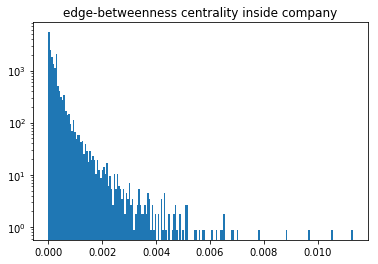

In [19]:
company_inter = nx.readwrite.edgelist.read_edgelist("company_inter_edges.txt")
company_inter.remove_node("id")
company_inter.remove_node("id_2")
dic_deg = dict(nx.degree(company_inter))
top3_degree = []
for item in sorted(dic_deg.items(), key=lambda item:item[1], reverse=True):
    if int(item[0]) in company_list:
        top3_degree.append(item)
    if len(top3_degree) == 3:
        break
print("Top 3 nodes with highest inter-category degree in company:")
for node in top3_degree:
    print("node: " + str(node[0]) + ", degree: " + str(node[1]))

    
company_inside = nx.readwrite.edgelist.read_edgelist("company_inside_edges.txt")
company_inside.remove_node("id")
company_inside.remove_node("id_2")
dic_cen = nx.edge_betweenness_centrality(company_inside)
plt.figure(figsize=(6, 4)) 
ds = [val for (node, val) in dic_cen.items()]
plt.hist(ds, bins=200, density=True, log=True)
plt.title('edge-betweenness centrality inside company')

Top 3 nodes with highest inter-category degree in politician:
node: 11003, degree: 145
node: 11158, degree: 95
node: 15612, degree: 86


Text(0.5, 1.0, 'edge-betweenness centrality inside politician')

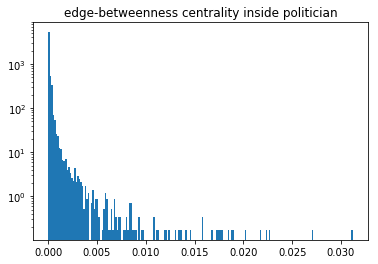

In [20]:
politician_inter = nx.readwrite.edgelist.read_edgelist("politician_inter_edges.txt")
politician_inter.remove_node("id")
politician_inter.remove_node("id_2")
dic_deg = dict(nx.degree(politician_inter))
top3_degree = []
for item in sorted(dic_deg.items(), key=lambda item:item[1], reverse=True):
    if int(item[0]) in politician_list:
        top3_degree.append(item)
    if len(top3_degree) == 3:
        break
    

print("Top 3 nodes with highest inter-category degree in politician:")
for node in top3_degree:
    print("node: " + str(node[0]) + ", degree: " + str(node[1]))

    
politician_inside = nx.readwrite.edgelist.read_edgelist("politician_inside_edges.txt")
politician_inside.remove_node("id")
politician_inside.remove_node("id_2")
dic_cen = nx.edge_betweenness_centrality(politician_inside)
plt.figure(figsize=(6, 4)) 
ds = [val for (node, val) in dic_cen.items()]
plt.hist(ds, bins=200, density=True, log=True)
plt.title('edge-betweenness centrality inside politician')

In [ ]:
# 2.1 Train a node classifier that uses 80% of nodes to predict the category of pages (and the other 20% for testing). 
# Note that this classifier can use the insights from the previous section as features.

In [22]:
tvshow_dic1 = dict(nx.degree(fb1))
tvshow_dic2 = dict(nx.clustering(fb1))
tvshow_dic3 = dict(nx.degree_centrality(fb1))

government_dic1 = dict(nx.degree(fb2))
government_dic2 = dict(nx.clustering(fb2))
government_dic3 = dict(nx.degree_centrality(fb2))

company_dic1 = dict(nx.degree(fb3))
company_dic2 = dict(nx.clustering(fb3))
company_dic3 = dict(nx.degree_centrality(fb3))

politician_dic1 = dict(nx.degree(fb4))
politician_dic2 = dict(nx.clustering(fb4))
politician_dic3 = dict(nx.degree_centrality(fb4))

In [23]:
# add features to each category
target2 = pd.read_csv('musae_facebook_target.csv')
for index, row in target2.iterrows():
    if index in tvshow_list:
        target2.loc[index, "page_type"] = 0
        target2.loc[index, "degree"] = tvshow_dic1[index]
        target2.loc[index, "clustering_coeff"] = tvshow_dic2[index]
        target2.loc[index, "centrality"] = tvshow_dic3[index]

    elif index in government_list:
        target2.loc[index, "page_type"] = 1
        target2.loc[index, "degree"] = government_dic1[index]
        target2.loc[index, "clustering_coeff"] = government_dic2[index]
        target2.loc[index, "centrality"] = government_dic3[index]
        
    elif index in company_list:
        target2.loc[index, "page_type"] = 2
        target2.loc[index, "degree"] = company_dic1[index]
        target2.loc[index, "clustering_coeff"] = company_dic2[index]
        target2.loc[index, "centrality"] = company_dic3[index]
        
    elif index in politician_list:
        target2.loc[index, "page_type"] = 3
        target2.loc[index, "degree"] = politician_dic1[index]
        target2.loc[index, "clustering_coeff"] = politician_dic2[index]
        target2.loc[index, "centrality"] = politician_dic3[index]    

In [24]:
# compute adjacency matrix
with open("musae_facebook_edges.csv") as f:
    data = np.loadtxt(f, delimiter = ",", skiprows = 1)
total_nodes = G.number_of_nodes()
ad_matrix = np.zeros((total_nodes,total_nodes))
for i in range(total_nodes):
    idx1 = data[i][0]
    idx2 = data[i][1]
    ad_matrix[int(idx1)][int(idx2)] = 1  
    ad_matrix[int(idx2)][int(idx1)] = 1

In [25]:
# compute data and label for classification
data_1 = np.array(target2[["degree","clustering_coeff","centrality"]])
data_classification = np.hstack((data_1, ad_matrix))

label = np.array(target2["page_type"],dtype=np.float64)
label = label[:, np.newaxis]

# devide train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_classification ,
                 label, test_size = 0.2, random_state=10)

In [26]:
# apply logistic regression
model = OneVsRestClassifier(LogisticRegression())
clf = model.fit(X_train, y_train)
clf.fit(X_train, y_train.ravel())
y_predict = clf.predict(X_test)
print(classification_report(y_test.ravel(), y_predict, target_names=["tvshow", "government", "company", "politician"]))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

              precision    recall  f1-score   support

      tvshow       0.90      0.29      0.43       669
  government       0.70      0.72      0.71      1359
     company       0.50      0.81      0.62      1327
  politician       0.75      0.48      0.58      1139

    accuracy                           0.62      4494
   macro avg       0.71      0.57      0.59      4494
weighted avg       0.68      0.62      0.61      4494



In [ ]:
# Verified and business Facebook pages are often maintained by marketing professionals/agencies 
# managing  multiple pages. Can you find evidence for groups of pages being managed by same 
# agencies? Considering that it is to the agency’s benefit for all their clients to have as 
# many “likes” from other verified pages as possible, what are they likely to do? Can you find
# evidence for this in the data? Can you find specific examples? Can you think of other 
# evidence for coordinated PR strategies? 

In [30]:
community_tvshow = list(k_clique_communities(fb1, 20))
community_government = list(k_clique_communities(fb2, 20))
community_company = list(k_clique_communities(fb3, 15))
community_politician = list(k_clique_communities(fb4, 15))
print("number of 20-clique communities in tvshow: " + str(len(community_tvshow)))
print("number of 20-clique communities in government: " + str(len(community_government)))
print("number of 20-clique communities in company: " + str(len(community_company)))
print("number of 20-clique communities in politician: " + str(len(community_politician)))

number of 20-clique communities in tvshow: 4
number of 20-clique communities in government: 9
number of 20-clique communities in company: 3
number of 20-clique communities in politician: 8


In [31]:
print("communities in tvhsow:")
for i in community_tvshow:
    print("\n")
    print("community:")
    print(target2.loc[i, "page_name"])
    

communities in tvhsow:


community:
3074                                   24: Legacy
6147                                       Cosmos
9996                                   Hotel Hell
13074                         Kicking & Screaming
21274                             Party Over Here
3103                                Wayward Pines
20516                                        Glee
7978                                 You The Jury
44                                        APB FOX
5165                                         BOOM
4401                              Houdini & Doyle
6706                                 The Resident
4917                                Home Free FOX
568                                   The Orville
18235                                    The Mick
20037                           MasterChef Junior
839                                 Scream Queens
11850                               Sleepy Hollow
21324                            The Exorcist FOX
1618          

In [32]:
print("communities in government:")
for i in community_government:
    print("\n")
    print("community:")
    print(target2.loc[i, "page_name"])

communities in government:


community:
5388              NSW SES Clarence Nambucca Region
16399                            NSW SES Ryde Unit
4373                     NSW SES North West Region
406                                        NSW SES
9496                     NSW SES Batemans Bay Unit
7195                            NSW SES Nowra Unit
15263                                  Maclean SES
1279                           NSW SES Uralla Unit
14502                          Fire and Rescue NSW
12987                          NSW SES Albury Unit
16193                          NSW SES Auburn Unit
13122                          NSW SES Mosman Unit
5953                         NSW SES Murray Region
18887                    NSW SES - Queanbeyan Unit
19272                NSW SES Richmond Tweed Region
11209                       NSW Rural Fire Service
9165                   NSW SES Murrumbidgee Region
2767          NSW SES Illawarra South Coast Region
12762                       NSW SES - Gosf

In [33]:
print("communities in company:")
for i in community_company:
    print("\n")
    print("community:")
    print(target2.loc[i, "page_name"])

communities in company:


community:
128                 New York Style
9602                     Mrs. Dash
1156         Wright's Liquid Smoke
11785                   Las Palmas
142          B&G Pickles & Peppers
2833                           B&M
11550                       Kroger
2080             Maple Grove Farms
13984                      Ac'cent
672                Regina Vinegars
7969                     Trappey's
8613                Molly McButter
682                 Cream of Wheat
10166                      Polaner
19129                  Baker's Joy
4930            Grandma's Molasses
2119                    Sugar Twin
9928                     Underwood
8396             Joan of Arc Beans
9936     Crock-Pot Seasoning Mixes
13423             Emeril's Cooking
17392                      Walmart
12145                  Brer Rabbit
10234           Vermont Maid Syrup
4476                    Old London
Name: page_name, dtype: object


community:
1926            Lidl Slovensko
6278         

In [34]:
print("communities in politician:")
for i in community_politician:
    print("\n")
    print("community:")
    print(target2.loc[i, "page_name"])

communities in politician:


community:
16128                            Annastacia Palaszczuk MP
22401                   Duncan Pegg - Member for Stretton
4738                                     Cathy O'Toole MP
4                       Mark Bailey MP - Labor for Miller
4109     Melissa McMahon - Labor candidate for Macalister
20624                                     Aaron Harper MP
5147                                          Linus Power
21280                                         Jackie Trad
21538                                      Grace Grace MP
1443                                 Senator Chris Ketter
10018                                   Dr Anthony Lynham
6823                                         Mark Ryan MP
2983                               Stirling Hinchliffe MP
9263                        Mick de Brenni for Springwood
3891                                       Curtis Pitt MP
6329                                        Joan Pease MP
12872                           

In [54]:
from networkx.algorithms.community import greedy_modularity_communities
mod_com = greedy_modularity_communities(fb1)
print("numbers of greedy_modularity_communities: " + str(len(mod_com)))
for com in mod_com[:1]:
    print("number of nodes in the community: " + str(len(com)))
    for node in com:
        print(target.loc[node, ["page_name","page_type"]])

numbers of greedy_modularity_communities: 123
number of nodes in the community: 542
page_name    Law & Order:  Special Victims Unit
page_type                                tvshow
Name: 4096, dtype: object
page_name    Big Love
page_type      tvshow
Name: 18438, dtype: object
page_name    The Wall
page_type      tvshow
Name: 16404, dtype: object
page_name    MSNBC Live with José Díaz-Balart
page_type                              tvshow
Name: 8225, dtype: object
page_name    Revenge
page_type     tvshow
Name: 16431, dtype: object
page_name    Sunday Night Football on NBC
page_type                          tvshow
Name: 2100, dtype: object
page_name    Kinetic Content: Betty White’s OTR
page_type                                tvshow
Name: 6199, dtype: object
page_name    Mad Men
page_type     tvshow
Name: 6206, dtype: object
page_name    FYI Philly
page_type        tvshow
Name: 14398, dtype: object
page_name    Extreme Makeover Home Edition
page_type                           tvshow
Name

page_name    RightThisMinute
page_type             tvshow
Name: 4789, dtype: object
page_name    American Music Awards
page_type                   tvshow
Name: 6836, dtype: object
page_name    Curb Your Enthusiasm
page_type                  tvshow
Name: 2743, dtype: object
page_name    What's On 6
page_type         tvshow
Name: 2760, dtype: object
page_name    The Voice
page_type       tvshow
Name: 4809, dtype: object
page_name    Sea Rescue
page_type        tvshow
Name: 4810, dtype: object
page_name    Ninja Warrior
page_type           tvshow
Name: 13001, dtype: object
page_name    Brothers and Sisters
page_type                  tvshow
Name: 2762, dtype: object
page_name    The Pacific
page_type         tvshow
Name: 15053, dtype: object
page_name    Better With You
page_type             tvshow
Name: 13007, dtype: object
page_name    Project Runway Vietnam
page_type                    tvshow
Name: 6873, dtype: object
page_name    Red Widow
page_type       tvshow
Name: 8923, dtype: obje

page_name    KGW's Live at 7
page_type             tvshow
Name: 3373, dtype: object
page_name    The Sing Off
page_type          tvshow
Name: 19758, dtype: object
page_name    The Line
page_type      tvshow
Name: 13621, dtype: object
page_name    Last Comic Standing
page_type                 tvshow
Name: 15670, dtype: object
page_name    Friday Night Lights
page_type                 tvshow
Name: 11579, dtype: object
page_name     Maron
page_type    tvshow
Name: 19771, dtype: object
page_name    Being Erica
page_type         tvshow
Name: 3392, dtype: object
page_name    The Kicks
page_type       tvshow
Name: 15681, dtype: object
page_name    Intelligence
page_type          tvshow
Name: 13638, dtype: object
page_name    Band of Brothers
page_type              tvshow
Name: 9549, dtype: object
page_name    Better Call Saul
page_type              tvshow
Name: 19789, dtype: object
page_name    Married with Children
page_type                   tvshow
Name: 7516, dtype: object
page_name    Twi

page_name       TDJ
page_type    tvshow
Name: 10176, dtype: object
page_name    The Office
page_type        tvshow
Name: 16328, dtype: object
page_name    Idiotest
page_type      tvshow
Name: 16329, dtype: object
page_name    Morning Joe
page_type         tvshow
Name: 12235, dtype: object
page_name    Good Morning Utah
page_type               tvshow
Name: 18380, dtype: object
page_name    Skin Wars
page_type       tvshow
Name: 18381, dtype: object
page_name    On The Money
page_type          tvshow
Name: 14289, dtype: object
page_name    The Gherm Guys
page_type            tvshow
Name: 16340, dtype: object
page_name    Kenny Powers of Eastbound & Down
page_type                              tvshow
Name: 14296, dtype: object
page_name    Ronan Farrow Daily
page_type                tvshow
Name: 16345, dtype: object
page_name    Ocean Mysteries with Jeff Corwin
page_type                              tvshow
Name: 16349, dtype: object
page_name    Kirstie
page_type     tvshow
Name: 8171, dty